<a href="https://colab.research.google.com/github/shaon11579/2022-spring-NLP-/blob/main/A5_Hasan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import string
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from pprint import pprint

In [7]:
def check_for_punc(x):
    temp  = True
    for c in x:
        if c != " ":
            temp = np.logical_and(temp,c in string.punctuation)
    if temp:
        return False
    return True

def generate_clean_file(input,output):
    file = open(input)
    lines = list(map(lambda x:x.split('('),file.readlines()))
    lines = list(filter(lambda x: len(x)>1,lines))
    lines = list(map(lambda x:x[-1].split(')')[0],lines))
    lines = list(filter(lambda x:x.split()[0]!= '-NONE-',lines))
    lines = list(filter(lambda x:check_for_punc(x),lines))
    lines = list(filter(lambda x: x.find('-LRB-') == -1,lines))
    lines = list(filter(lambda x: x.find('-RRB-') == -1,lines))
    ind = np.array([i for i in range(len(lines)) if lines[i].find('TOP END_OF_TEXT_UNIT') != -1])
    lines = np.array(lines)

    sentences = []
    for i in range(len(ind)-1):
        sentences.append(" ".join(lines[ind[i]+1:ind[i+1]]))
    sentences.append(" ".join(lines[ind[-1]+1:]))
    out  = open(output,"w")
    for line in sentences:
        if len(line)>0:
            out.write(line)
            out.write('\n')


In [4]:
inputfiles = '/content/SnapshotBROWN.pos.all.txt'
outputfiles = 'SnapshotBROWN-clean.pos-all.txt'

In [8]:


def get_words(outputfiles):
    file = open(outputfiles)
    lines = (" ".join(list(map(lambda x:x.split("\n")[0],file.readlines())))).split(" ")
    lines = list(filter(lambda x:x!='',lines))
    return lines


In [9]:
def get_hash_of_word_pos(lines):
    tuple_collection = [(lines[k],lines[k+1]) for k in range(0,len(lines)-1,2)]
    temp = Counter(tuple_collection)
    first_dict = {}
    for key in temp.keys():
        if key[0] not in first_dict.keys():
            first_dict[key[0]] = {key[1]:temp[key]}
        else:
            first_dict[key[0]].update({key[1]:temp[key]})
    return first_dict

def report_20_most_frequent_from_brown(lines):
    tuple_collection = [(lines[k],lines[k+1]) for k in range(0,len(lines)-1,2)]
    temp = Counter(tuple_collection)
    first_dict = {}
    for key in temp.keys():
        if key[0] not in first_dict.keys():
            first_dict[key[0]] = {key[1]:temp[key]}
        else:
            first_dict[key[0]].update({key[1]:temp[key]})
    hash_of_pos = first_dict
    freq = {}
    for key in hash_of_pos:
        freq[key] = sum([int(hash_of_pos[key][key1]) for key1 in hash_of_pos[key].keys()])
    print('The twenty most frequent tags are')
    for u,v in Counter(freq).most_common(20):
        print(u,v)

In [10]:
def get_accuracy(lines,hash_of_word_pos):
    tags = [lines[i] for i in range(0,len(lines)-1,2)]
    words = [lines[i+1] for i in range(0,len(lines)-1,2)]
    most_freq = []
    match = 0
    for i,word in enumerate(words):
        most_freq.append(Counter(hash_of_word_pos[word]).most_common(1)[0][0])
    for k in range(len(most_freq)):
        if most_freq[k] == tags[k]:
            match+=1
    print(match,len(most_freq),"Accuracy is ",100*match/len(most_freq),'%')

def show_bar_plot(words_dict):
    names = (u for u,v in words_dict)
    values = [v for u,v in words_dict]
    ind = np.arange(len(values))

    fig, axs = plt.subplots(figsize=(9, 3))
    axs.bar(ind, values)
    plt.xticks(ind,names)
    plt.title("Bar plot showing the relationship of word against their frequencies")
    plt.show()

In [11]:
def normal_bigram(text,bigrm_dict):
    matrix = np.array([[0 for k in range(len(text.split())+1)] for i in range(len(text.split())+1)],dtype=object)
    matrix[1:,0] = text.split()
    matrix[0,1:] = text.split()
    for i in range(1,len(text.split())+1,1):
        for j in range(1,len(text.split())+1,1):
            tuple = (text.split()[i-1].strip().lower(),text.split()[j-1].strip().lower())
            matrix[i,j] = bigrm_dict[tuple]

    for i in range(np.shape(matrix)[0]):
        for j in range(np.shape(matrix)[1]):
            if i==0 and j==0:
                print(matrix[i,j],' '*19,end="")
            elif i==0 or j==0:
                print(matrix[i,j],' '*(20-len(matrix[i,j])),end="")
            else:
                print(matrix[i,j],' '*19,end="")
        print()


In [12]:
def add_one_smoothed_bigram_probabilities(text,words_dict,bigrm_dict,unigram_dict):
    vocab_size = len(list(words_dict.keys()))
    matrix = np.array([[0 for k in range(len(text.split())+1)] for i in range(len(text.split())+1)],dtype=object)
    matrix[1:,0] = text.split()
    matrix[0,1:] = text.split()
    for i in range(1,len(text.split())+1,1):
        for j in range(1,len(text.split())+1,1):
            tuple = (text.split()[i-1].strip().lower(),text.split()[j-1].strip().lower())
            matrix[i,j] = ((bigrm_dict[tuple]+1)/(unigram_dict[tuple[0]]+vocab_size))*unigram_dict[tuple[0]]
            matrix[i,j] = "%.5f" % round(matrix[i,j],5)
    for i in range(np.shape(matrix)[0]):
        for j in range(np.shape(matrix)[1]):
            if i==0 and j==0:
                print(matrix[i,j],' '*19,end="")
            elif i==0 or j==0:
                print(matrix[i,j],' '*(20-len(matrix[i,j])),end="")
            else:
                print(matrix[i,j],' '*13,end="")
        print()


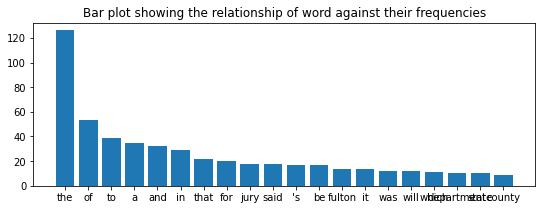

In [15]:
# Answer to (i): generate clean file
generate_clean_file(inputfiles,outputfiles)

#read the output file=clean brown file
lines = get_words(outputfiles)

words = [item.lower() for i,item in enumerate(lines) if i%2!=0]
words_dict = Counter(words).most_common(20)

# Answer to question 1
show_bar_plot(words_dict)





words_dict = Counter(words)
text = "A similar resolution passed in the Senate"
tokens = nltk.word_tokenize(text.lower())
bigrm_database = nltk.bigrams(words)
unigram_dict = Counter(list(words))
bigrm_dict = Counter(list(bigrm_database))


In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
# Answer to question 2
print("Normal bigram counts")
normal_bigram(text,bigrm_dict)
print()
print()
print()
print("Add one smoothed bigram count")
add_one_smoothed_bigram_probabilities(text,words_dict,bigrm_dict,unigram_dict)

Normal bigram counts
0                    A                    similar              resolution           passed               in                   the                  Senate               
A                    0                    0                    1                    0                    0                    0                    0                    
similar              0                    0                    0                    0                    0                    0                    0                    
resolution           0                    0                    0                    0                    0                    0                    0                    
passed               0                    0                    0                    0                    0                    0                    0                    
in                   1                    0                    0                    0                    0                    12      